<a href="https://colab.research.google.com/github/AndreAmorim05/data-science/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Analisando a Violência no Rio de Janeiro

É evidente que a viaolencia tem vivido uma tendencia de crescimento ao decorrer dos anos em diverssas cidades do Brasil e do mundo, como visto em noticiários jornais e em mídias eletrônicas em geral, existem diversos casos aos quais a polícia tem de se posicionar a respeito.

Através das leis de acesso à informação e a iniciativa de alguns orgãos do governo, dados de diversas categorias estão sendo disponibilizados ao público, um ótimo exemplo é o [portal ISPDados](http://www.ispdados.rj.gov.br/), fornecido pelo estado do Rio de Janeiro, onde podemos encontrar os dados referentes a criminalidade, objeto alvo deste estudo.

## Obtenção dos Dados


Os dados utilizados neste projeto foram obtidos através da página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro, o portal ISPDados.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do dataset a ser utilizado aqui, o arquivo csv pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv)

### Importando os dados e bibliotecas


In [1]:
# importando blibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# importando o dataset
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv')

## Análise Inicial dos Dados

A análise exploratória dos dados pode nos trazer grandes *insights* à respeito de um *dataset*, os quais podem ser de extrema importancia para o desenvolvimento de um raciocínio e obtenção de conclusões precisas e estratégicas a respeito do problema alvo da análise.



### Tamanho do DataFrame
Inicialmente é importante fazer-se uma verificação rápida do tamanho do *DataFrame* gerado pelo *DataSet* utilizado, para se obter uma noção da quantidade de dados para estudo. 
Como apresentado logo a seguir nosso *DataFrame* possui:


*   344 linhas;
*   56 colunas.



---



> *DataFrame* é uma estrutura de dados desenvolvida na biblioteca Pandas e utilizada para visualização, tratamento e manipulação de dados em forma de tabela





In [ ]:
# tamanho do DataFrame (Linhas, Colunas)
df.shape

(344, 56)

### Título do DataFrame
Como visto anteriormente nosso DataFrame possui um quantitativo de 56 colunas, como cada coluna possui características distintas é importante sabermos o que cada uma representa. Para isso podemos analizar da seguinte forma: 



---


> Podemos analizar diretamente os títulos das colunas utilizando o comando 

```
df.columns
```
> porém para ter um controle visual melhor que em um objeto do tipo lista podemos utilizar o pequeno ``script`` a seguir:





In [2]:
# título de cada coluna de dados
colunas = list(df.columns)
lista = ''
for cont, coluna in enumerate(colunas):
  if cont%5 == 0:
    lista = lista + '\n'
  lista = lista + '{},\t'.format(coluna,end='')
print(lista)


vano,	mes,	hom_doloso,	lesao_corp_morte,	latrocinio,	
hom_por_interv_policial,	tentat_hom,	lesao_corp_dolosa,	estupro,	hom_culposo,	
lesao_corp_culposa,	roubo_comercio,	roubo_residencia,	roubo_veiculo,	roubo_carga,	
roubo_transeunte,	roubo_em_coletivo,	roubo_banco,	roubo_cx_eletronico,	roubo_celular,	
roubo_conducao_saque,	roubo_apos_saque,	roubo_bicicleta,	outros_roubos,	total_roubos,	
furto_veiculos,	furto_transeunte,	furto_coletivo,	furto_celular,	furto_bicicleta,	
outros_furtos,	total_furtos,	sequestro,	extorsao,	sequestro_relampago,	
estelionato,	apreensao_drogas,	posse_drogas,	trafico_drogas,	apreensao_drogas_sem_autor,	
recuperacao_veiculos,	apf,	aaapai,	cmp,	cmba,	
ameaca,	pessoas_desaparecidas,	encontro_cadaver,	encontro_ossada,	pol_militares_mortos_serv,	
pol_civis_mortos_serv,	indicador_letalidade,	indicador_roubo_rua,	indicador_roubo_veic,	registro_ocorrencias,	
fase,	


### Tipo de dados de cada coluna
Algo realmente muito importante de se ter em mente é o tipo de dados que estamos trabalhando, pois artifícos matemáticos utilizados corriqueiramente em esturtura de dados numéricos em geral não servirão para tipos de texto (strings) ou objetos sem uma prévia manipulação. Por isso é importante sabermos quais dados cada coluna possui.

> Dados do tipo int e float são variáveis numéricas.

In [ ]:
# tipo de cada doluna de dados
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

### Utilização da função **head()**
Tanto a função **head()** quanto a função **tail()**, são importantes para uma análise geral rápida de como nosso *DataFrame* está estruturado, sendo estes artifícios visuais muito valiosos em uma análise exploratória.



---


> **head()** - função que retorna em forma de tabela as primeras linhas do DataFrame, a quantidade de linhas passada por parâmetro será retornada (número padrão de linhas sendo igual a 5 caso nada seja passado como parâmetro).


> **tail()** - função que retorna em forma de tabela as últimas linhas do DataFrame, a quantidade de linhas passada por parâmetro será retornada (número padrão de linhas sendo igual a 5 caso nada seja passado como parâmetro).










In [ ]:
# apresentação das 5 primeiras colunas do DataFrame
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


### Dados faltantes
Um dos grandes problemas na análise de dados é possuir dados ausentes no seu *DataSet*, estes ditam a qualidade do banco de dados pois quanto menor for a quantidade de dados ausentes melhor será trabalhar com o  *DataFrame* e os *insights* obtidos serão mais fidedígnos.

A seguir analizamos a porcentagem de dados ausentes ou faltantes do nosso *DataFrame* por coluna.

> Os dados faltantes são caracterizados pela sigla **NaN** (*Not a Number*).

In [ ]:
# identificando por coluna seu percentual de dados faltantes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

## Informações Estatísticas da Violência no Rio de Janeiro

Outro artifício importante para se obter uma visão generalizada do DataFrame é utilizar uma descrição estatística do mesmo. Esta análise nos permite ter informações como valores máximos e mínimos, quartis, média, mediana e desvio padrão de cada coluna.




### Resumo estatístico


In [ ]:
# demonstrando resumo estatístico dos dados
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

#### Média de roubos, furtos e recuperações de veiculos
---
Uma coisa importante é avaliar a média de alguns valores para termos uma ideia de como se comportam os números dos regitros de ocorrencias tendo base um valor fixo que podemos avaliar qualquer outra quantidade em volta deste, para assim termos condições de determinar se os casos estão em uma tendencia crescente além deste valor médio ou se estão sofrendo baixas.



In [ ]:
#  média das colunas desejadas
print(f'A média para a coluna {"roubo_veiculo"} é de {round(df.roubo_veiculo.mean(),0)}\n')
print(f'A média para a coluna {"furto_veiculos"} é de {round(df.furto_veiculos.mean(),0)}\n')
print(f'A média para a coluna {"recuperacao_veiculos"} é de {round(df.recuperacao_veiculos.mean(), 0)}\n')

A média para a coluna roubo_veiculo é de 2449.0

A média para a coluna furto_veiculos é de 1675.0

A média para a coluna recuperacao_veiculos é de 1772.0



#### Carros recuperados
---
Uma análise importante é saber qual a porcentagem de automóveis que conseguem ser recuperados após serem furtados e/ou roubados, isso nos dá uma ideia da eficiencia das buscas por esses automóveis em particular

> Através da seguinte equação determinamos a porcentagem de automóveis recuperados em relação aos furtado e roubados:
* $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$



In [ ]:
# a porcentagem de carros recuperados em relação aos furtados e roubados é representada a seguir
print('{}%'.format(round(100*(df.recuperacao_veiculos.sum()/ (df.roubo_veiculo.sum()+df.furto_veiculos.sum())), 4)))

42.9803%


#### Mínimo e máximo casos de homicídio doloso mensal
---
Durante o registro do *DataSet* houveram meses nos quais os casos se apresentaram mais amenos ou mais rígidos nos dando assim uma noção de períodos em que se sobressaíram do habitual e excederam ou não atingiram o valor habitual de casos a seguir apresentamos estes valores. 


In [ ]:
minimo = df.hom_doloso.min()
maximo = df.hom_doloso.max()
df_minimo = df[['vano','mes']].loc[df.hom_doloso == minimo]
df_maximo = df[['vano','mes']].loc[df.hom_doloso == maximo]
tabela = pd.merge(df_minimo, df_maximo, how='outer', on=['vano', 'mes'])
tabela.index = np.array(['mínimo', 'maxímo'])
tabela['mes'] = pd.to_datetime(tabela['mes'], format='%m').dt.month_name().str.slice(stop=3)
tabela['N° de homicídios'] = np.array([minimo, maximo])
tabela.columns = ['Ano', 'Mês', 'N° de homicídios']
tabela



,Ano,Mês,N° de homicídios
mínimo,2015,Jun,272
maxímo,1995,Jan,831


## Visualização de Dados


A visualização de dados na forma gráfica nos auxilia muito no entendimento do valores registados no *Dataset*, a seguir temos duas representações gráficas de algumas variáveis selecionadas.


### Plotando casos de homicídio doloso
---
A seguir temos um histograma que apresenta os valores de Homicídio Doloso (quando não se há intenção de morte), através deste gráfico podemos notar que ao decorrer dos meses registrados no *Data Frame* houve certa margem de casos pois poucas foram as vezes em que os casos foram menores que 350 casos e maiores que 650, se concentrando mais na faixa entre estes valores.


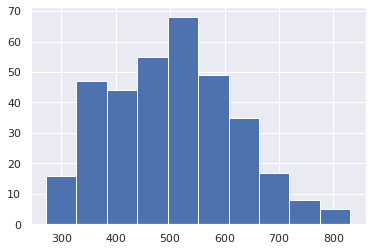

In [ ]:
# histograma da coluna hom_doloso (homicídio doloso)
df.hom_doloso.hist();

### Plotando casos de roubos em coletivo
---
Uma forma simples de se obter um conceito rápido de crescimento ou seu oposto em um determinado período é através de um gráfico de linhas, esse pode nos trazer informações visuais precisas e de fácil compreensão. 

A seguir analisamos os casos de roubos em coletivos no período de 1991 a 2019, esta análise nos mostra que os casos tendem a oscilar com frequência durante os meses do ano, porém apesar de ter uma grande queda entre o fim de 2016 e início de 2017, a partir de 2015 a tendencia foi de um elevado crescimento.  


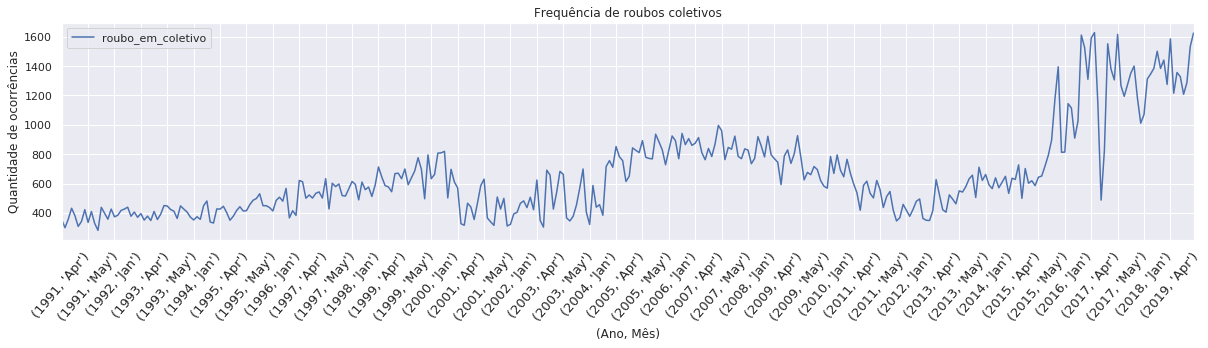

In [ ]:
# gráfico de linha para a coluna roubo_em_coletivo
# df.roubo_em_coletivo.plot();
fig, ax = plt.subplots(figsize=(17,5))
df2 = df
try:
  df2['mes'] = pd.to_datetime(df2['mes'], format='%m').dt.month_name().str.slice(stop=3)
except:
  pass
ano = df2[['vano','mes','roubo_em_coletivo']].groupby(['vano', 'mes']).mean()
ano.plot(ax=ax)
ax.set_title('Frequência de roubos coletivos')
ax.set_xlabel('(Ano, Mês)')
ax.set_ylabel('Quantidade de ocorrências')

comprimento = 8
ano_label = ano.iloc[range(0,len(ano.index), comprimento)]

plt.xticks(range(0,len(ano.index), comprimento), labels=ano_label.index)
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=50, fontsize=13)
plt.tight_layout()

## Conclusão

Através do estudo realizado sobre os indicadores de violência no Rio de Janeiro, notamos que é importante sempre que se trabalha com uma base de dados entender a qualidade desses dados, isso nos gera uma confiança maior sobre os valores obtidos posteriormente.

Através da análise realizada podemos obter informações importantes de como os índices de criminalidade foram se modificando ao decorrer dos anos, este geralmente seguem uma tendência, de crescimento, declínio ou estabilidade, porém fatores sazonais ou pontuais podem interferir de forma expressiva a quantidade de cada índice, como o aumento de policiamento, eventos públicos, entre outos.